<a href="https://colab.research.google.com/github/Yaroslav1121/MachineLearning/blob/main/%D0%9B%D0%B0%D0%B1_5_%D0%B7%D0%B0%D0%B2%D0%B4_1_%D0%9A%D0%BB%D0%B8%D0%BC%D1%96%D0%BA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Лабораторна робота 5.
Метод ліктя. Кластеризація даних.

In [4]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target

# Друкуємо перші 5 рядків
print(iris_df.head())



   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  


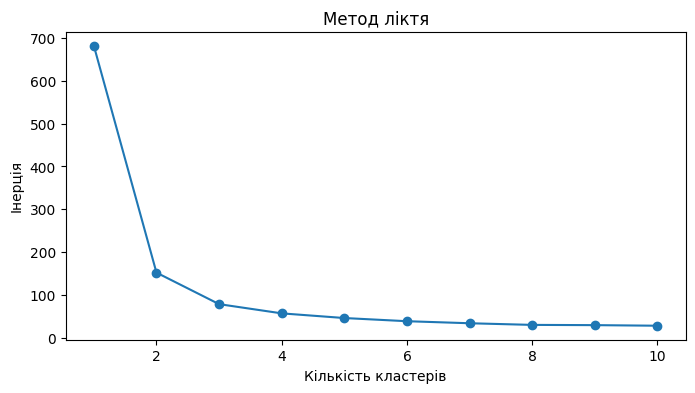

In [6]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

inertia = []

# Розглянемо кількість кластерів від 1 до 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(iris_df.iloc[:, :-1])
    inertia.append(kmeans.inertia_)

# Візуалізуємо метод ліктя
plt.figure(figsize=(8, 4))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Метод ліктя')
plt.xlabel('Кількість кластерів')
plt.ylabel('Інерція')
plt.show()


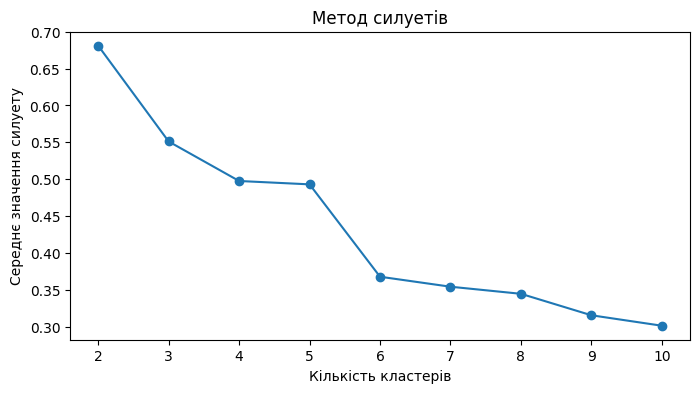

In [7]:
from sklearn.metrics import silhouette_score

# Масив для зберігання значень середнього силуету для різної кількості кластерів
silhouette = []

# Розглянемо кількість кластерів від 2 до 10 (1 немає сенсу розглядати)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(iris_df.iloc[:, :-1])
    silhouette.append(silhouette_score(iris_df.iloc[:, :-1], labels))

# Візуалізуємо метод силуетів
plt.figure(figsize=(8, 4))
plt.plot(range(2, 11), silhouette, marker='o')
plt.title('Метод силуетів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середнє значення силуету')
plt.show()


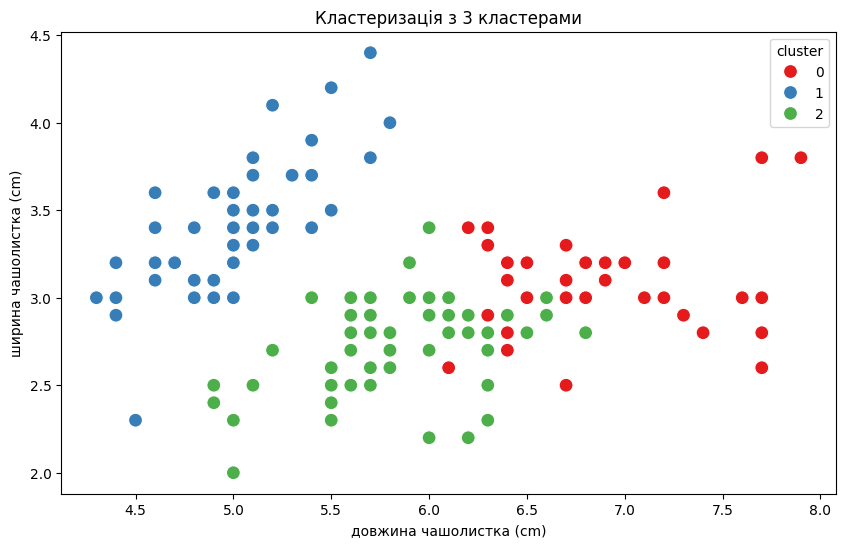

In [8]:
import seaborn as sns

# Вибираємо оптимальну кількість кластерів (наприклад, 3)
optimal_clusters = 3
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
iris_df['cluster'] = kmeans.fit_predict(iris_df.iloc[:, :-1])

# Візуалізуємо кластери
plt.figure(figsize=(10, 6))
sns.scatterplot(x=iris_df.iloc[:, 0], y=iris_df.iloc[:, 1], hue=iris_df['cluster'], palette='Set1', s=100)
plt.title(f'Кластеризація з {optimal_clusters} кластерами')
plt.xlabel('довжина чашолистка (cm)')
plt.ylabel('ширина чашолистка (cm)')
plt.show()


З аналізу графіку методу ліктя можна побачити точку згину, яка вказує на оптимальну кількість кластерів.Метод силуетів показав найвищі значення середнього коефіцієнта силуету при 2-3 кластерах. Це свідчить про те, що дані добре поділяються на 2 або 3 групи. Візуалізація показала, що іриси поділяються на три чіткі групи.